In [71]:
import pandas as pd
import geopandas as gp
import numpy as np

from bawsvis.data_handler import get_area, rasterize_daily_shp, filter_shapes

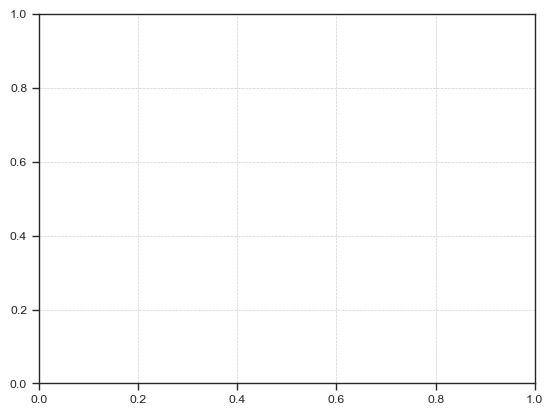

In [127]:
import matplotlib.pyplot as plt
# plt.axhline(y=0.5, color='r', linestyle='-')
plt.grid(True, which='minor', axis='x')
plt.show()

In [ ]:
print("Default max_rows: {} and min_rows: {}".format(
pd.get_option("max_rows"), pd.get_option("min_rows")))

In [ ]:
pd.options.display.max_rows = None

In [ ]:
def test_filtering(file):
    gf = gp.read_file(file)
    a = filter_shapes(gf)
    
    # print(a)
    print(gf)

In [ ]:
test_filtering(r'c:\Arbetsmapp\BAWS\Årsrapport 2023\Data_test\corrected_geoms\cyano_daymap_20230803.shp')

In [ ]:
test_filtering(r'c:\Arbetsmapp\BAWS\Årsrapport 2023\Data_test\corrected_geoms\cyano_daymap_20230803.shp')

In [ ]:
# def sub_basin_shp_info():
areas = gp.read_file(
    r'c:\Arbetsmapp\Shapefiler\Sub-basins_Baltic_Sea\Havsomr_SVAR_2016_3b.shp'
    # r'C:\Utveckling\w_sharktoolbox\SharkToolbox\data\shapefiles\SVAR 2016_3b_for_statistic_plotting\statistic_areas.shp'
)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
basin_geometries = areas[['BASIN_NR', 'geometry']]
basins = basin_geometries.dissolve(by='BASIN_NR', as_index=False)
basins.loc[:]

selected_basins = (3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
basins['BASIN_NR'].isin(selected_basins)

In [ ]:
areas = gp.read_file(
    # r'c:\Arbetsmapp\Shapefiler\Sub-basins_Baltic_Sea\Havsomr_SVAR_2016_3b.shp'
    r'C:\Arbetsmapp\Shapefiler\HELCOM_Sub-basins_Baltic_Sea\HELCOM_subbasins_2022_level2.shp'
)
# areas = areas.to_crs(epsg=3006)
# selected_basins = [f'{n}' for n in
#                     (3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)]
# boolean_filter = areas[''].isin(selected_basins)
# areas = areas.loc[boolean_filter, :].reset_index(drop=True)
# areas['area'] = areas['geometry'].apply(lambda geom: int(geom.area))
# areas['area_threshold'] = areas['area'].apply(lambda a: int(a * .8))

areas.loc[:]

In [ ]:
areas = gp.read_file(
    # r'c:\Arbetsmapp\Shapefiler\Sub-basins_Baltic_Sea\Havsomr_SVAR_2016_3b.shp'
    r'C:\Arbetsmapp\Shapefiler\HELCOM_Sub-basins_Baltic_Sea\HELCOM_subbasins_2022_level2.shp'
)
areas = areas.to_crs(epsg=3006)
areas = areas.loc
selected_basins = [f'SEA-0{n}' for n in
                    ('03', '04', '06', '07', '08', '09', 10, 11, 12, 13, 14, 15)]
boolean_filter = areas['HELCOM_ID'].isin(selected_basins)
areas = areas.loc[boolean_filter, :].reset_index(drop=True)
areas['area'] = areas['geometry'].apply(lambda geom: int(geom.area))
areas['area_threshold'] = areas['area'].apply(lambda a: int(a * .8))

areas.loc[:]

In [113]:
fid = r'C:\Kodning\BAWS-vis\area_season_bloom_all.xlsx'

stats = None
for year in range(2002, 2024):
    df = pd.read_excel(
        fid,
        sheet_name=f'{year}',
    )
    if not stats:
        stats = {
            str(y): {
                a: {
                    'start': [],
                    'end': [],
                } for a in df['BASIN']
            } for y in range(2002, 2024)
        }

    for b in df['BASIN']:
        boolean = df['BASIN'] == b
        df_dates_only = df.drop(columns='BASIN')
        arr = df_dates_only.loc[boolean, :].values
        idx = np.logical_or(arr == 2, arr == 3)[0]
        dates = df_dates_only.columns[idx]
        if any(dates):
            stats[str(year)][b]['start'] = dates[0]
            stats[str(year)][b]['end'] = dates[-1]
        else:
            stats[str(year)][b]['start'] = np.nan
            stats[str(year)][b]['end'] = np.nan

In [120]:
start_values = [stats[y][b]['start'] for y in stats]
start_values = pd.Series([pd.Timestamp(f'2023{d[4:]}') for d in start_values if not pd.isnull(d)])
print(start_values)

0   2023-07-14
1   2023-09-16
2   2023-08-18
dtype: datetime64[ns]


In [80]:
basins = df['BASIN'].to_list()
basins.append('All')
print(basins)
for b in basins:
    dummy_year = '2023{}'
    if b != 'All':
        start_values = [stats[y][b]['start'] for y in stats]
        print("start_values:", start_values)
        start_values = pd.Series([pd.Timestamp(d[4:]) for d in start_values if not pd.isnull(d)])
        end_values = [stats[y][b]['end'] for y in stats]
        end_values = pd.Series([pd.Timestamp(d) for d in end_values if not pd.isnull(d)])

In [84]:
start_values = [stats[y][b]['start'] for y in stats]
print(start_values)

[nan, nan, nan, nan, '20060714', nan, nan, nan, nan, nan, nan, nan, nan, nan, '20160916', nan, nan, nan, '20200818', nan, nan, nan]


In [92]:
start_values = [stats[y][b]['start'] for y in stats]
dummy_year = '2022{}'
# start_test = pd.Timestamp(dummy_year.format(d[4:]) for d in start_values if not pd.isnull(d))
start_test = pd.Timestamp(dummy_year.format('20060714'[4:]))
print(start_test)

2022-07-14 00:00:00


In [96]:
year = 2023
for d in start_values:
    if not pd.isnull(d):
        test = pd.Timestamp(f'{year}{d[4:]}')
print(test)

2023-08-18 00:00:00


In [98]:
for b in basins:
    dummy_year = '2022'
    start_values = [stats[y][b]['start'] for y in stats]
    start_values = pd.Series([pd.Timestamp(dummy_year.format(d[4:])) for d in start_values if not pd.isnull(d)])
    end_values = [stats[y][b]['end'] for y in stats]
    end_values = pd.Series([pd.Timestamp(dummy_year.format(d[4:])) for d in end_values if not pd.isnull(d)])

KeyError: 'All'

In [74]:
print(start_values)
print(end_values)

0   2022-07-14
1   2022-09-16
2   2022-08-18
dtype: datetime64[ns]
0   2022-08-06
1   2022-09-16
2   2022-08-18
dtype: datetime64[ns]
